First we will create some dummy data on a regular latitude/longitude grid:

In [1]:
import numpy as np

lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

In order to demonstrate the error before "best practice", we will create a map using the Plate Carree projection but only specify the "projection" argument. Remember that the best practice requires both projection and transform arguments to be defined. 

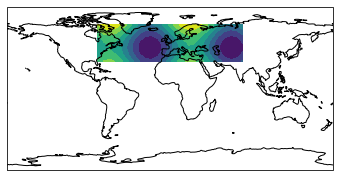

In [2]:
# Import cartopy and matplotlib
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# didn't use transform, but looks ok...
ax.contourf(lon, lat, data)  
plt.show()

In this case, the data just happen to fall in the correct location. Now, we will define the data coordinate reference system (first line of code below) and add the transform argument to the plot (second last line of code below).

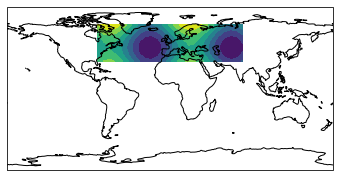

In [3]:
# The data are defined in lat/lon coordinate system, 
# so PlateCarree() is the appropriate choice:
data_crs = ccrs.PlateCarree()

# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

# use transform
ax.contourf(lon, lat, data, transform=data_crs) 
plt.show()

You will notice that our plot remains unchanged. The assumption, as stated previously, is that if the coordinate reference system of the data is undefined, it is the same as the map (or plot) projection. In the example above, this has been the case. Let us now investigate what happens when changing the projection of the map without defining the coordinate reference system of the data. We now define the projection to "RotatedPole" and omit the transform argument to see what happens:

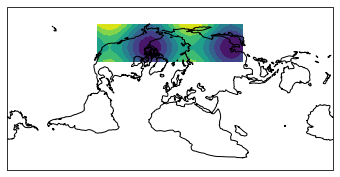

In [4]:
#Old version
# Now we plot a rotated pole projection
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, uh oh!
plt.show()

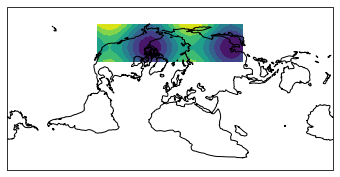

In [6]:
# New version
# Now we plot a rotated pole projection
data_projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=data_projection)
ax.set_global()
ax.coastlines()

ax.contourf(lon, lat, data)  # didn't use transform, uh oh!
plt.show()

In this case, we see that the country boundaries have rotated and changed shape, however, the data did not move with the the country boundaries. We made a wrong assumption in the data definition. Therefore we need to define the transform argument:

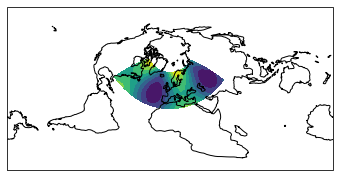

In [7]:
# A rotated pole projection again...
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

# ...but now using the transform argument
ax.contourf(lon, lat, data, transform=data_crs)
plt.show()

Now the data are correctly projected. Get in the habit of always defining the coordinate reference system and the map plot projection. It will save headaches and misunderstandings of the data.

Here is another script using an entirely different projection and additional plotting parameters. Can you figure out what the script will produce before running the cell? Notice the presence of the Matplotlib function subplot.

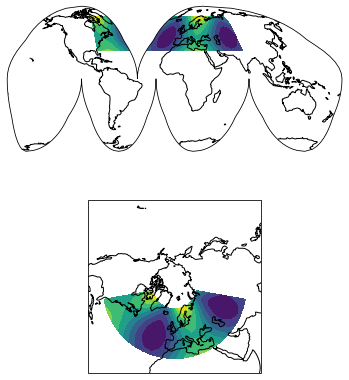

In [8]:
# We can choose any projection we like...
projection = ccrs.InterruptedGoodeHomolosine()
plt.figure(figsize=(6, 7))
ax1 = plt.subplot(211, projection=projection)
ax1.set_global()
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.NorthPolarStereo())
ax2.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax2.coastlines()

# ...as long as we provide the correct transform, 
# the plot will be correct
ax1.contourf(lon, lat, data, transform=data_crs)
ax2.contourf(lon, lat, data, transform=data_crs)
plt.show()

Now that you have worked through the exercise, you should have an understanding of why it is important to fully define the coordinate reference system and the projection when creating a map.